## **University Score Prediction and Recommendation based on NIRF (Ministry of Education)**

**Objective**
1. Trying to predict the score of universities based on certain parameters set by NIRF which are
* Teaching Learning & Resources - These parameters are related to the core activities of any place of learning.
* Research and Professional Practice - Excellence in teaching and learning is closely associated with the scholarship.
* Graduation Outcome - This parameter forms the ultimate test of the effectiveness of the core teaching/learning.
* Outreach & Inclusivity - The Ranking framework lays special emphasis on representation of women.
* Perception - The ranking methodology gives a significant importance to the perception of the institution.

2. University recommendation based on the scores obtained by the universities.

**Introduction**

In this project, the application gathers and prepares the universities data from the NIRF website(of the desired year). Then feed the prepared data to the model so that it can learn. After then, feed the fresh data (University data) into the trained model and see if the model just trained predict it accurately or not. This application also recommend the university based on the the overall score and the scores under various parameters obtained by the universities.

**Python** is an open source programming language that was made to be easy-to-read and powerful. A Dutch programmer named Guido van Rossum made Python in 1991. He named it after the television show Monty Python's Flying Circus. Many Python examples and tutorials include jokes from the show.
Python is an interpreted language. Interpreted languages do not need to be compiled to run. A program called an interpreter runs Python code on almost any kind of computer. This means that a programmer can change the code and quickly see the results. This also means Python is slower than a compiled language like C, because it is not running machine code directly.

Python is a good programming language for beginners. It is a high-level language, which means a programmer can focus on what to do instead of how to do it. Writing programs in Python takes less time than in some other languages.
Python drew inspiration from other programming languages like C, C++, Java, Perl, and Lisp.

Python has a very easy-to-read syntax. Some of Python's syntax comes from C, because that is the language that Python was written in. But Python uses whitespace to delimit code: spaces or tabs are used to organize code into groups. This is different from C. In C, there is a semicolon at the end of each line and curly braces ({}) are used to group code. Using whitespace to delimit code makes Python a very easy-to-read language.


**Web Scraping**

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
html_content = requests.get('https://www.nirfindia.org/2022/UniversityRanking.html').text

In [ ]:
uni_data = BeautifulSoup(html_content,'lxml')
uni_data

<html><body><p>ï»¿<!DOCTYPE html>
</p><script async="" src="//www.google-analytics.com/analytics.js"></script><script>(function (i, s, o, g, r, a, m) {i['GoogleAnalyticsObject'] = r; i[r] = i[r] || function () {(i[r].q = i[r].q || []).push(arguments)}, i[r].l = 1 * new Date(); a = s.createElement(o),m = s.getElementsByTagName(o)[0]; a.async = 1; a.src = g; m.parentNode.insertBefore(a, m)})(window, document, 'script', '//www.google-analytics.com/analytics.js', 'ga');ga('create', 'UA-75867016-1', 'auto');ga('send', 'pageview');</script><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title> MoE, National Institute Ranking Framework (NIRF) </title><link href="https://www.nirfindia.org/css/style.css" rel="stylesheet" type="text/css"/><script src="https://www.nirfindia.org/js/modernizr.js" type="text/javascript"></script><script src="https://www.nirfindia.org/js/jquery-min.js" type="text/javascript"></script><script src="https://www.nirfindia.org/js/md5.js" type="text/ja

In [ ]:
table = uni_data.find('table')
table

<table class="table table-condensed" id="tbl_overall"><thead><tr><th style="20%">Institute ID</th><th>Name</th><th>City</th><th>State</th><th>Score</th><th>Rank</th></tr></thead><tbody><tr><td>IR-O-U-0220</td><td>Indian Institute of Science<div style="float:right;"><a class="btn-more-details" href="javascript:;"><span>More Details</span></a><a class="close_data" id="close_1" style="display: none;">Close</a> | <a href="https://www.nirfindia.org/nirfpdfcdn/2022/pdf/University/IR-O-U-0220.pdf" target="_blank"><img src="https://www.nirfindia.org/images/pdf_icon.png" style="width: 20px; height: 20px !important"/></a> | <a href="https://www.nirfindia.org/nirfpdfcdn/2022/graph/University/IR-O-U-0220.png" target="_blank"><img src="https://www.nirfindia.org/images/graph.png" style="width: 20px; height: 20px !important"/></a></div><div class="tbl_hidden" style="display:none;width:100%;"><br/><table class="table "><thead><tr><th>TLR (100)</th><th>RPC (100)</th><th>GO (100)</th><th>OI (100)</th><t

In [ ]:
rows = table.find_all('tr')
rows

[<tr><th style="20%">Institute ID</th><th>Name</th><th>City</th><th>State</th><th>Score</th><th>Rank</th></tr>,
 <tr><td>IR-O-U-0220</td><td>Indian Institute of Science<div style="float:right;"><a class="btn-more-details" href="javascript:;"><span>More Details</span></a><a class="close_data" id="close_1" style="display: none;">Close</a> | <a href="https://www.nirfindia.org/nirfpdfcdn/2022/pdf/University/IR-O-U-0220.pdf" target="_blank"><img src="https://www.nirfindia.org/images/pdf_icon.png" style="width: 20px; height: 20px !important"/></a> | <a href="https://www.nirfindia.org/nirfpdfcdn/2022/graph/University/IR-O-U-0220.png" target="_blank"><img src="https://www.nirfindia.org/images/graph.png" style="width: 20px; height: 20px !important"/></a></div><div class="tbl_hidden" style="display:none;width:100%;"><br/><table class="table "><thead><tr><th>TLR (100)</th><th>RPC (100)</th><th>GO (100)</th><th>OI (100)</th><th>PERCEPTION (100)</th></tr></thead><tbody><tr><td>82.08</td><td>87.45</

In [ ]:
content = list()
for row in rows:
  cells = row.find_all(['td','th'])
  # print(cells)
  cells_text = [cell.text for cell in cells]
  content.append(cells_text)

In [ ]:
df = pd.DataFrame(content)
df.to_csv('NIRF_UNiversity2022.csv')

### **Training, Prediction and Recommendation**

**Training Data**
Our training data consists of the totals obtained by Universities under various parameters (TLR, RPC,	GO, OI, PERCEPTION and Score). All training data can be retrieved from the file NIRF_University2022.csv.

**Prepare Training Data**
Model accepts the scores obtained by universities under the parameters as a input and labels so that for each evaluation the model knows which class the university belongs to and the overall score of the university (originally evaluated by NIRF).

**For example:** 

*(For Score Prediction)*

Features                                           

* TLR(100)	- 82.08
* RPC(100)  - 87.45
* GO(100)	  - 84.80
* OI(100)	  - 57.46
* PERCEPTION(100)	 - 100.00

Labels

* Score	- 83.57	

*(For Recommendation)*

Features                                           

* TLR(100)	- 82.08
* RPC(100)  - 87.45
* GO(100)	  - 84.80
* OI(100)	  - 57.46
* PERCEPTION(100)	 - 100.00
* Score	- 83.57

Labels

* Recommend - 1

In [69]:
import pandas as pd

**Data Preparation**

In [70]:
df = pd.read_csv('/content/NIRF_UNiversity2022.csv')
df.head(5)

,Institute ID,Name,TLR (100),RPC (100),GO (100),OI (100),PERCEPTION (100),City,State,Score,Rank
0,IR-O-U-0220,Indian Institute of Science,82.08,87.45,84.80,57.46,100.00,Bengaluru,Karnataka,83.57,1.0
1,TLR (100),RPC (100),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,82.08,87.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IR-O-U-0109,Jawaharlal Nehru University,71.95,45.55,95.27,70.27,71.43,New Delhi,Delhi,68.47,2.0
4,TLR (100),RPC (100),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
data = df.dropna()
data.head()

,Institute ID,Name,TLR (100),RPC (100),GO (100),OI (100),PERCEPTION (100),City,State,Score,Rank
0,IR-O-U-0220,Indian Institute of Science,82.08,87.45,84.80,57.46,100.00,Bengaluru,Karnataka,83.57,1.0
3,IR-O-U-0109,Jawaharlal Nehru University,71.95,45.55,95.27,70.27,71.43,New Delhi,Delhi,68.47,2.0
6,IR-O-U-0108,"Jamia Millia Islamia, New DelhiMore DetailsClo...",68.16,47.38,92.46,81.14,46.50,New Delhi,Delhi,65.91,3.0
9,IR-O-U-0575,Jadavpur UniversityMore DetailsClose | | TLR ...,63.57,53.73,90.10,56.86,64.67,Kolkata,West Bengal,65.37,4.0
12,IR-O-U-0436,Amrita Vishwa VidyapeethamMore DetailsClose | ...,69.80,50.06,74.09,69.53,56.66,Coimbatore,Tamil Nadu,63.40,5.0


In [72]:
name=data['Name']
name

0                            Indian Institute of Science
3                            Jawaharlal Nehru University
6      Jamia Millia Islamia, New DelhiMore DetailsClo...
9      Jadavpur UniversityMore DetailsClose |  | TLR ...
12     Amrita Vishwa VidyapeethamMore DetailsClose | ...
                             ...                        
285    Shoolini University of Biotechnology and Manag...
288    Yenepoya UniversityMore DetailsClose |  | TLR ...
291    Visva BharatiMore DetailsClose |  | TLR (100)R...
294    Birla Institute of TechnologyMore DetailsClose...
297    Dr. M. G. R. Educational and Research Institut...
Name: Name, Length: 100, dtype: object

In [73]:
university_names = list()
for i in name:
  university_names.append(i.split('More')[0])
  # print(university_names)
university_names

['Indian Institute of Science',
 'Jawaharlal Nehru University',
 'Jamia Millia Islamia, New Delhi',
 'Jadavpur University',
 'Amrita Vishwa Vidyapeetham',
 'Banaras Hindu University',
 'Manipal Academy of Higher Education, Manipal',
 'Calcutta University',
 'Vellore Institute of Technology',
 'University of Hyderabad',
 'Aligarh Muslim University',
 'Savitribai Phule Pune University',
 'University of Delhi',
 'Institute of Chemical Technology',
 'Bharathiar University',
 'Siksha `O` Anusandhan',
 'Homi Bhabha National Institute',
 'Birla Institute of Technology & Science - Pilani',
 'S.R.M. Institute of Science and Technology',
 'Kalinga Institute of Industrial Technology',
 'Anna University',
 'Osmania University',
 'Amity University',
 'Shanmugha Arts Science Technology & Research Academy',
 'Panjab University',
 'Saveetha Institute of Medical and Technical Sciences',
 'Koneru Lakshmaiah Education Foundation University (K L College of Engineering)',
 'Alagappa University',
 'Chandiga

In [74]:
# data['Name'] = pd.Series(university_names)
data = data.drop(['Name'],axis='columns')

In [75]:
data['Name'] = university_names

In [76]:
data

,Institute ID,TLR (100),RPC (100),GO (100),OI (100),PERCEPTION (100),City,State,Score,Rank,Name
0,IR-O-U-0220,82.08,87.45,84.80,57.46,100.00,Bengaluru,Karnataka,83.57,1.0,Indian Institute of Science
3,IR-O-U-0109,71.95,45.55,95.27,70.27,71.43,New Delhi,Delhi,68.47,2.0,Jawaharlal Nehru University
6,IR-O-U-0108,68.16,47.38,92.46,81.14,46.50,New Delhi,Delhi,65.91,3.0,"Jamia Millia Islamia, New Delhi"
9,IR-O-U-0575,63.57,53.73,90.10,56.86,64.67,Kolkata,West Bengal,65.37,4.0,Jadavpur University
12,IR-O-U-0436,69.80,50.06,74.09,69.53,56.66,Coimbatore,Tamil Nadu,63.40,5.0,Amrita Vishwa Vidyapeetham
...,...,...,...,...,...,...,...,...,...,...,...
285,IR-O-U-0190,38.80,28.11,68.66,58.25,15.71,Solan,Himachal Pradesh,41.19,96.0,Shoolini University of Biotechnology and Manag...
288,IR-O-U-0250,61.19,11.89,49.62,71.14,20.65,Mangaluru,Karnataka,41.03,97.0,Yenepoya University
291,IR-O-U-0589,44.85,24.43,76.87,33.44,14.65,Santiniketan,West Bengal,40.96,98.0,Visva Bharati
294,IR-O-U-0202,49.52,27.74,56.39,49.86,12.40,Ranchi,Jharkhand,40.69,99.0,Birla Institute of Technology


**Quick Vizualization**

In [77]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Rank')

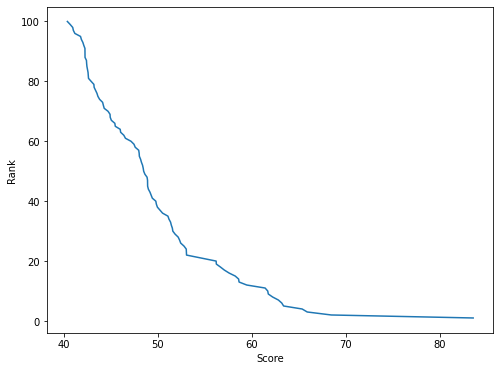

In [78]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(6)
plt.plot(data['Score'],data['Rank'])
plt.xlabel('Score')
plt.ylabel('Rank')

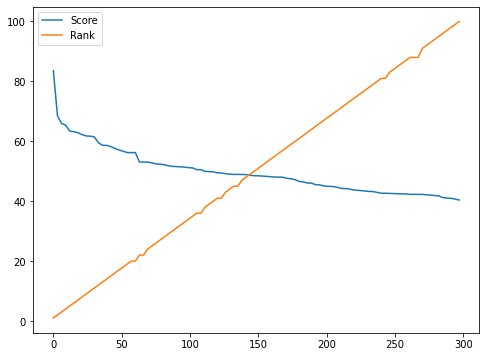

In [79]:
data[['Score','Rank']].plot(figsize=(8,6))

**Linear** **Regression**

To predict the ranks based on the scores obtained by the universities(under NIRF annual rankings).

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [81]:
df_train, df_test = train_test_split(data,test_size=0.2)

In [82]:
df_train.head()

,Institute ID,TLR (100),RPC (100),GO (100),OI (100),PERCEPTION (100),City,State,Score,Rank,Name
15,IR-O-U-0500,69.90,43.91,97.74,57.32,37.76,Varanasi,Uttar Pradesh,63.20,6.0,Banaras Hindu University
285,IR-O-U-0190,38.80,28.11,68.66,58.25,15.71,Solan,Himachal Pradesh,41.19,96.0,Shoolini University of Biotechnology and Manag...
39,IR-O-U-0308,59.27,50.58,79.61,54.50,42.91,Mumbai,Maharashtra,58.61,14.0,Institute of Chemical Technology
243,IR-O-U-0372,54.61,19.03,55.28,68.45,26.53,Bathinda,Punjab,42.64,81.0,Central University of Punjab
201,IR-O-U-0369,42.84,28.84,73.16,59.69,28.53,Puducherry,Pondicherry,44.95,68.0,Pondicherry University


In [83]:
df_test.head()

,Institute ID,TLR (100),RPC (100),GO (100),OI (100),PERCEPTION (100),City,State,Score,Rank,Name
75,IR-O-I-1441,56.29,43.01,69.46,65.97,21.71,Chennai,Tamil Nadu,52.45,26.0,Saveetha Institute of Medical and Technical Sc...
12,IR-O-U-0436,69.80,50.06,74.09,69.53,56.66,Coimbatore,Tamil Nadu,63.40,5.0,Amrita Vishwa Vidyapeetham
276,IR-O-U-0451,63.69,8.60,61.40,61.21,19.54,"Kelambakkam, Chengalpattu District",Tamil Nadu,42.04,93.0,Chettinad Academy of Research and Education
132,IR-O-U-0318,55.16,22.52,82.54,55.95,35.08,Mumbai,Maharashtra,48.93,45.0,Mumbai University
123,IR-O-I-1110,69.78,19.22,64.27,61.30,37.63,Pune,Maharashtra,49.43,41.0,Dr. D. Y. Patil Vidyapeeth


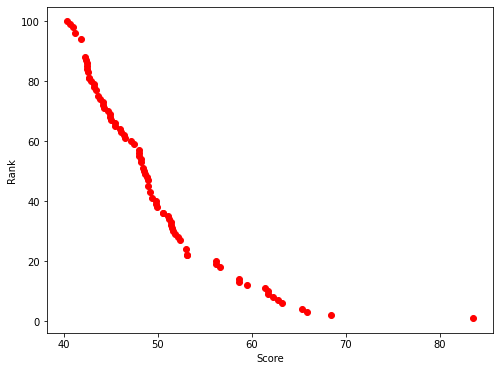

In [84]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(6)
plt.xlabel('Score')
plt.ylabel('Rank')
plt.scatter(df_train['Score'].values,df_train['Rank'].values,color='red')

In [85]:
mod = LinearRegression()
mod.fit(df_train[['Score']].values,df_train.Rank.values)

LinearRegression()

In [86]:
predicted_val = mod.predict(df_test[['Score']].values)

In [87]:
df_test['Rank']

75     26.0
12      5.0
276    93.0
132    45.0
123    41.0
261    88.0
267    88.0
225    76.0
42     15.0
129    44.0
45     16.0
57     20.0
153    52.0
72     25.0
171    58.0
288    97.0
273    92.0
270    91.0
48     17.0
282    95.0
Name: Rank, dtype: float64

In [88]:
predicted_val[predicted_val < 1] = 1
predicted_val

array([41.23725143,  5.10044543, 75.59196837, 52.85383199, 51.20374952,
       74.83293043, 74.83293043, 70.64172097, 22.09629482, 52.58981879,
       24.24140203, 28.79562964, 54.63592105, 40.0821937 , 57.2100497 ,
       78.92513495, 75.26195187, 74.86593208, 25.92448615, 76.4170096 ])

In [89]:
predicted_val = predicted_val.round(decimals=0, out=None)
predicted_val

array([41.,  5., 76., 53., 51., 75., 75., 71., 22., 53., 24., 29., 55.,
       40., 57., 79., 75., 75., 26., 76.])

In [90]:
mod.score(df_test[['Score']].values,df_test.Rank.values)

0.8601574450100883

Text(0, 0.5, 'Rank')

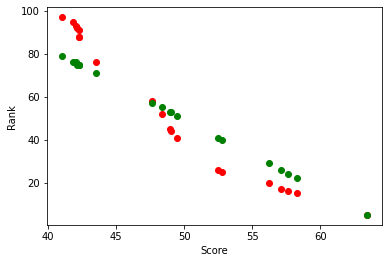

In [91]:
plt.scatter(df_test[['Score']].values,df_test.Rank.values, color='red')
plt.scatter(df_test[['Score']].values,predicted_val, color='green')
plt.xlabel('Score')
plt.ylabel('Rank')

**Multivariable Linear Regression**

To determine the University's overall Score based on examining the parameters TLR, RPC, GO, OI and Perception.

In [92]:
model = LinearRegression()
model.fit(df_train[['TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)', 'PERCEPTION (100)']].values,df_train.Score.values)

LinearRegression()

In [93]:
y_predicted = model.predict(df_test[['TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)','PERCEPTION (100)']].values)

In [94]:
model.predict(df_test[['TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)','PERCEPTION (100)']].values)

array([52.44610176, 63.39562054, 42.04381438, 48.91603625, 49.45065681,
       42.2679979 , 42.27574302, 43.5534207 , 58.244004  , 49.00398286,
       57.60322702, 56.21041453, 48.3920538 , 52.80710845, 47.60204967,
       41.02659342, 42.13639123, 42.26232412, 57.08814893, 41.79596305])

In [95]:
model.score(df_test[['TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)','PERCEPTION (100)']].values,df_test.Score.values)

0.9999985964943421

**Logistic Regression**

To recommend the University based on the Overall Score of Universities.

*Assumption*

Universities with overall Score greater than 45 are considered for recommendation and remaining with overall Score less than 45 are not considered for recommendation.

In [96]:
recommend=[]
for row in data['Score']:
    if row <=45 :
        recommend.append('0')
    else: 
        recommend.append('1')

In [97]:
data['Recommend'] = recommend

In [143]:
data.head()

,Institute ID,TLR (100),RPC (100),GO (100),OI (100),PERCEPTION (100),City,State,Score,Rank,Name,Recommend
0,IR-O-U-0220,82.08,87.45,84.80,57.46,100.00,Bengaluru,Karnataka,83.57,1.0,Indian Institute of Science,1
3,IR-O-U-0109,71.95,45.55,95.27,70.27,71.43,New Delhi,Delhi,68.47,2.0,Jawaharlal Nehru University,1
6,IR-O-U-0108,68.16,47.38,92.46,81.14,46.50,New Delhi,Delhi,65.91,3.0,"Jamia Millia Islamia, New Delhi",1
9,IR-O-U-0575,63.57,53.73,90.10,56.86,64.67,Kolkata,West Bengal,65.37,4.0,Jadavpur University,1
12,IR-O-U-0436,69.80,50.06,74.09,69.53,56.66,Coimbatore,Tamil Nadu,63.40,5.0,Amrita Vishwa Vidyapeetham,1


In [118]:
X_train, X_test, y_train, y_test = train_test_split(data[['Score']],data.Recommend,test_size=0.2)

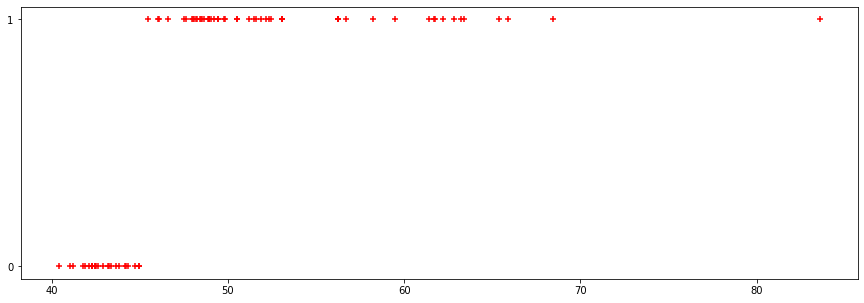

In [119]:
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(5)
plt.scatter(X_train, y_train, marker = '+', color='red' )

In [101]:
from sklearn.linear_model import LogisticRegression 

In [102]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train,y_train)

LogisticRegression()

In [103]:
y_predicted=Log_reg.predict(X_test)

In [104]:
Log_reg.score(X_test,y_predicted)

1.0

**Decision Tree Classifier**

To recommend the University evaluating the various attributes (evaluating the parameters) in our dataframe.

In [ ]:
data

In [128]:
input_data = data.drop(['Institute ID', 'City',	'State', 'Rank', 'Name', 'Recommend'], axis = 'columns')

In [129]:
input_data.head()

,TLR (100),RPC (100),GO (100),OI (100),PERCEPTION (100),Score
0,82.08,87.45,84.80,57.46,100.00,83.57
3,71.95,45.55,95.27,70.27,71.43,68.47
6,68.16,47.38,92.46,81.14,46.50,65.91
9,63.57,53.73,90.10,56.86,64.67,65.37
12,69.80,50.06,74.09,69.53,56.66,63.40


In [130]:
target = data['Recommend']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target, test_size = 0.2)

In [132]:
X_train.head()

,TLR (100),RPC (100),GO (100),OI (100),PERCEPTION (100),Score
288,61.19,11.89,49.62,71.14,20.65,41.03
141,69.68,17.07,64.33,65.08,34.74,48.87
18,70.53,51.07,78.15,64.81,42.46,62.84
150,68.42,17.66,64.52,62.17,35.08,48.46
225,57.47,11.05,67.95,56.11,37.93,43.54


In [133]:
from sklearn import tree

In [134]:
decision_model = tree.DecisionTreeClassifier()
decision_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [135]:
y_predicted = decision_model.predict(X_test)

In [136]:
y_predicted

array(['1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1',
       '1', '0', '1', '1', '0', '0', '1'], dtype=object)

In [137]:
decision_model.score(X_test,y_test)

1.0

[Text(0.5, 0.75, 'X[5] <= 45.01\ngini = 0.43\nsamples = 80\nvalue = [25, 55]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 55\nvalue = [0, 55]')]

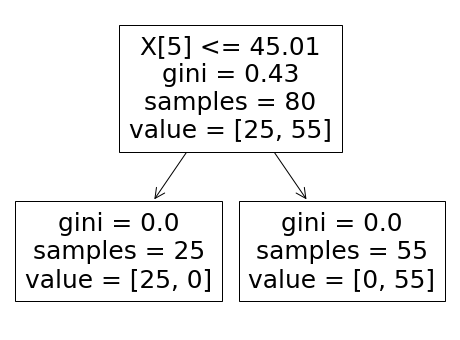

In [138]:
plt.figure(figsize=(8,6))
tree.plot_tree(decision_model)

In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [141]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 8,  0],
       [ 0, 12]])

Text(51.0, 0.5, 'Truth')

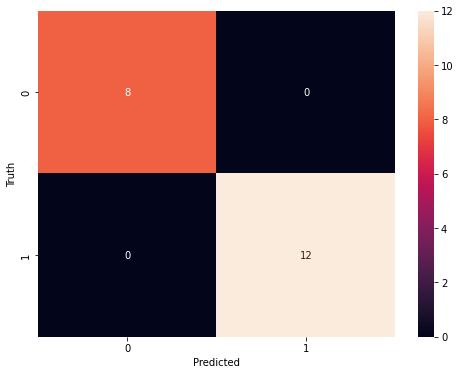

In [142]:
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Software Requirements**

Languages and Packages used


●	Python3.6+ , Libraries - pandas, sklearn, bs4, matplotlib

●	Platform - Google Colab

Hardware Requirements

●	System Processor: i3  or later.

●	RAM: 4GB DDR RAM.(Minimum)


**Bibliography**

1. https://www.nirfindia.org/2022/UniversityRanking.html